## Agricultural Production



### Preface



Some packages we need to have installed (skip this if already installed):



In [58]:
%pip install plotly
%pip install wbdata
%pip install cufflinks
%pip install eep153_tools

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Malthus



Among all the things ever written by social scientists (or &ldquo;political philosophers&rdquo;, to use a term he would have recognized), Malthus&rsquo; [&ldquo;Essay on Population&rdquo; (1798)](https://oll.libertyfund.org/titles/malthus-an-essay-on-the-principle-of-population-1798-1st-ed) must be among the most influential.  You can find the first edition at the link above. The main argument is spelled out in Chapter 1, which I encourage you to read.  A key point of the essay begins with [two postulata](https://oll.libertyfund.org/titles/311#Malthus_0195_20):

-   **First:** That food is necessary to the existence of man.
-   **Secondly:** That the passion between the sexes is necessary and will remain nearly in its present state.

These lead to a conclusion:

>     Assuming then, my postulata as granted, I say, that the power of
>     population is indefinitely greater than the power in the earth to
>     produce subsistence for man.  Population, when unchecked, increases
>     in a geometrical ratio. Subsistence increases only in an
>     arithmetical ratio. A slight acquaintance with numbers will shew
>     the immensity of the first power in comparison of the second.



#### Malthus meets math



Malthus&rsquo; argument boils down to a mathematical assertion: that
    population grows at an exponential rate, while food production
    increases only linearly.  We might write this as
    $$
       \mbox{Population}_t = \mbox{Population}_0e^{rt},
    $$
    where $r$ is the rate of population growth, and $t$ is the number
    of years that have passed; and
   $$
       \mbox{Food}_t = \mbox{Food}_0 + mt.
    $$
    If we lack a &ldquo;slight acquaintance&rdquo; with numbers a graph makes the
    point:



In [59]:
import numpy as np
import pandas as pd
from scipy.optimize import newton
import cufflinks as cf
cf.go_offline()

# Play with these constants
## for exponential
P0 = 1
r = 0.02  # Rate of population growth

## for line
F0 = 10
m = 100

def food_production(t,m=m):
    return F0+m*t

def population(t,r=r):
    return P0*np.exp(r*t)

def choose_xaxis(r,m,x0=10):
    """
    Find a range of x so that curves intersect
    """
    tstar = -1
    try:
        while tstar <= 0:
            tstar = newton(lambda t: food_production(t,m) - population(t,r),x0,maxiter=1000)
            x0 = x0*10
        return np.linspace(0,tstar*1.1,100)
    except RuntimeError: # Failed to find root
        return np.linspace(0,1000,100)
import plotly.graph_objs as go
from ipywidgets import interactive, HBox, VBox
T = choose_xaxis(r,m)

data = [ dict(name ='Food production', 
              line= dict (color = 'red', width=6),
              x = T,
              y= [food_production (t) for t in T]),
              dict(name = 'Population', 
              line = dict (color = 'blue', width=6),
              x = T, 
              y=[population (t) for t in T])]
layout = dict()
f = go.FigureWidget (data=data, layout =layout)
def update_pop(r,m):
    T = choose_xaxis(r,m)
    f.data[1].y = [population(t,r) for t in T]
    f.data[0].x = T
    f.data[1].x = T


### Food Production



Malthus thought that population would have to increase at an exponential rate.  We&rsquo;ve seen that in fact the rate of population increase has been roughly linear over the last six decades. (There are no guarantees about the future!)

Malthus also thought that food production (&ldquo;subsistence&rdquo;) could only increase linearly (&ldquo;arithmetically&rdquo;).  We&rsquo;ll next take a look to see what the data say about this.



#### Finding data



### How is agricultural production increasing?



We&rsquo;ve seen that growth in food production is typically greater than
 population growth.  But where is this growth coming from?

Food (and crops in particular) are the classical example of
production.  The &ldquo;classical&rdquo; economists in the 18th century, when
most income came from agriculture, thought there were three main
&ldquo;factors&rdquo; of production:

-   Land
-   Labor
-   Capital

Thus one might write the technical relationship between &ldquo;factors&rdquo; (or
inputs) and output as
$$
    \text{Crop output} = F(\mbox{Land},\mbox{Labor},\mbox{Capital}).
 $$



### Functional forms



We have good reason to think that $F$ displays constant returns to
  scale; i.e., is homogeneous of degree one.  Write it as
  $F(x_1,x_2,\dots,x_n)$ (thus abstracting from the classical factors
  of production).

Observationally, it&rsquo;s also often the case the cost share for
different factors of production remains constant, even when prices
change.  If we combine these facts (linearly homogeneous, constant
cost shares) with an assumption that farmers operating this
production function are profit maximizing price-takers and a
technical assumption that $F$ is continuously differentiable, then
one can prove that $F$ is &ldquo;Cobb-Douglas&rdquo;, or
$$
      F(x_1,x_2,\dots,x_n) = A\prod_{i=1}^nx_i^{\alpha_i},
  $$
where $\sum_{i=1}^n\alpha_i=1$.  This is a result first established
by the economist Paul Douglas and the mathematician Charles Cobb in 1928.

If we observe output at time $t$ for country $j$, say $y^j_t$ and inputs $x^j_{it}$, we can take the
logarithm of the Cobb-Douglas production function, obtaining
$$
     \log y^j_t = \log A^j_t + \sum_{i=1}^n\alpha^j_i\log(x^j_{it}).
  $$
Note that we&rsquo;ve allowed the cost-share parameters $\alpha$ to vary
across both inputs and also countries, but *not* over time.



### Total Factor Productivity



The term $A$ is sometimes called &ldquo;Total Factor Productivity&rdquo; (TFP),
   because increases in $A$ increase productivity of all factors.  If
   we take differences in log output over time we get
   $$
      \Delta\log y^j_t = \Delta\log A^j_t + \sum_{i=1}^n\alpha^j_i\Delta\log(x^j_{it}).
   $$
   Recall that changes in logs approximate percent changes or growth
   rates, so we can use this equation to decompose output growth into
   growth in input use and TFP growth.



### Data on Food Production



What’s happened to food production over recent decades?
 See
 [https://www.ers.usda.gov/data-products/international-agricultural-productivity/](https://www.ers.usda.gov/data-products/international-agricultural-productivity/).

Data on TFP, output, factor use, and factor shares can be found at
[https://docs.google.com/spreadsheets/d/1IL9BYacvhs6oIOAnp2KWYdTsoqIqReA2jGRlpheB9kQ/](https://docs.google.com/spreadsheets/d/1IL9BYacvhs6oIOAnp2KWYdTsoqIqReA2jGRlpheB9kQ/),
which is publicly readable.



### Visualizing data on ag production



# The Living Production for the selected Countries

In [60]:
selected_five = ['CHN','PHL','PAK','BGD','IND','WLD']

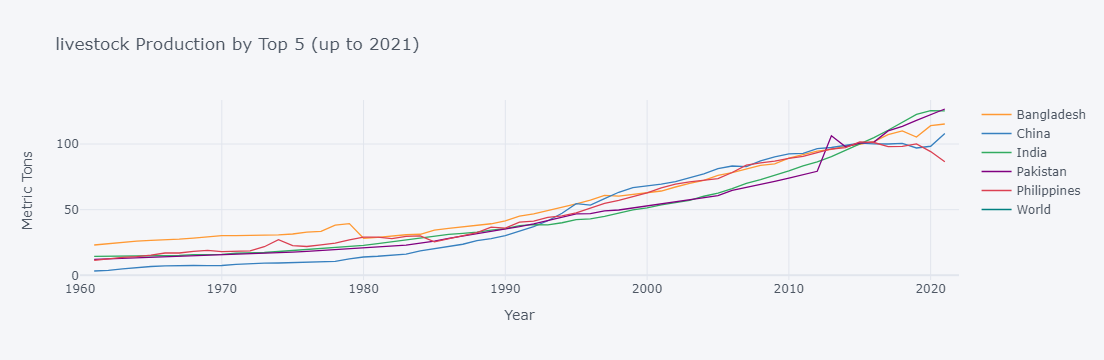

In [61]:
var_1 = {"AG.PRD.LVSK.XD":"Livestock index"}

livestock= fix_date_index(wbdata.get_dataframe(var_1,country=selected_five)).squeeze().unstack('country')

livestock.iplot(xTitle="Year",yTitle="Metric Tons",
              title="livestock Production by Top 5 (up to 2021)")

# The food production for the selected Countries


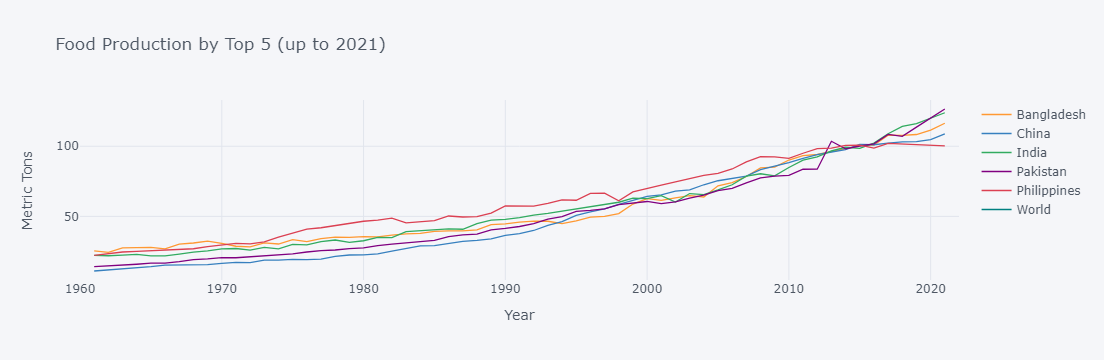

In [62]:
var_2 = { "AG.PRD.FOOD.XD":"Food index"}

food = fix_date_index(wbdata.get_dataframe(var_2,country=selected_five)).squeeze().unstack('country')

food.iplot(xTitle="Year",yTitle="Metric Tons",
              title="Food Production by Top 5 (up to 2021)")

# The crop production for the selected Countries

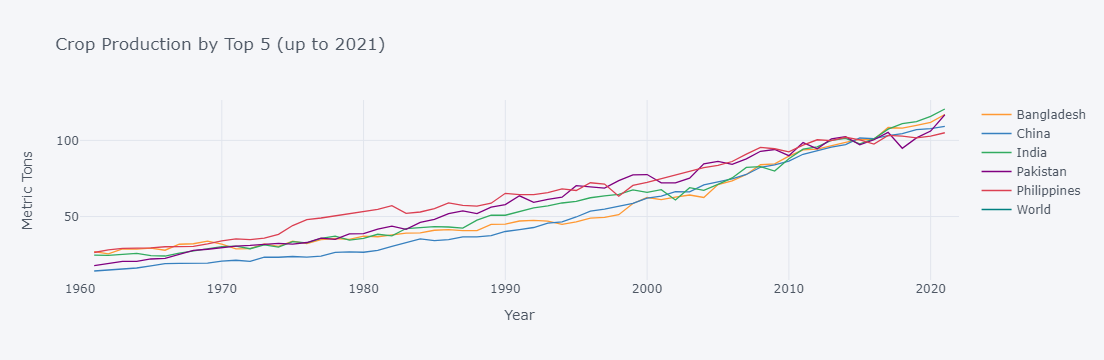

In [63]:
var_3 = {"AG.PRD.CROP.XD":"Crop index"}

crop = fix_date_index(wbdata.get_dataframe(var_3,country=selected_five)).squeeze().unstack('country')

crop.iplot(xTitle="Year",yTitle="Metric Tons",
              title="Crop Production by Top 5 (up to 2021)")

# The Population for the selected countries

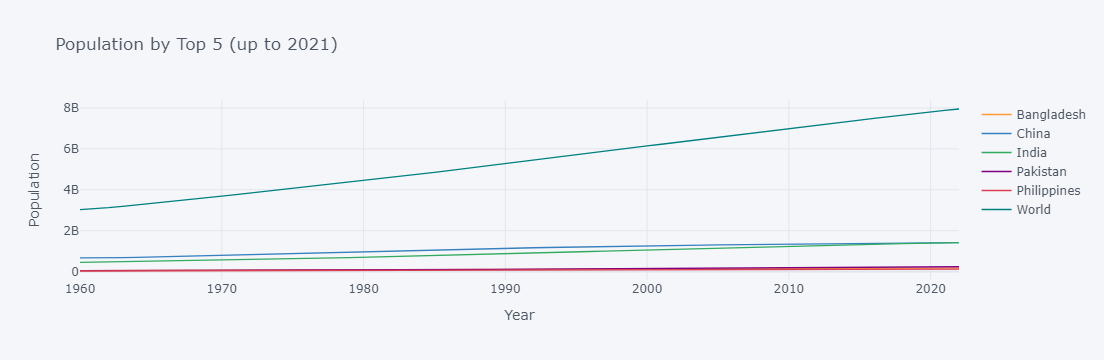

In [64]:
var_4 = {"SP.POP.TOTL":"Population"}

pop = fix_date_index(wbdata.get_dataframe(var_4,country=selected_five)).squeeze().unstack('country')

pop.iplot(xTitle="Year",yTitle="Population",
              title="Population by Top 5 (up to 2021)")

# World Population Pyramids

In [65]:
age_ranges = []
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

In [66]:
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

In [67]:
world = wbdata.get_dataframe(variables,country="WLD")

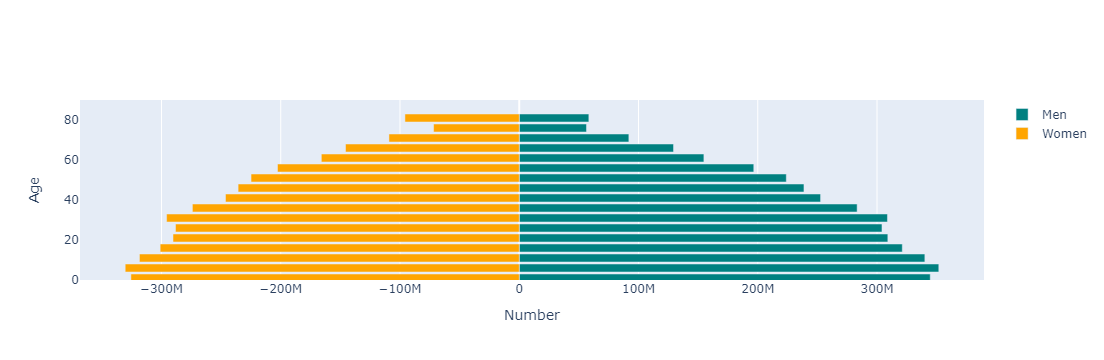

In [68]:
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = 2021

bins = [go.Bar(x = world.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -world.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

# China population pyramid


In [69]:
china = wbdata.get_dataframe(variables,country='CHN')

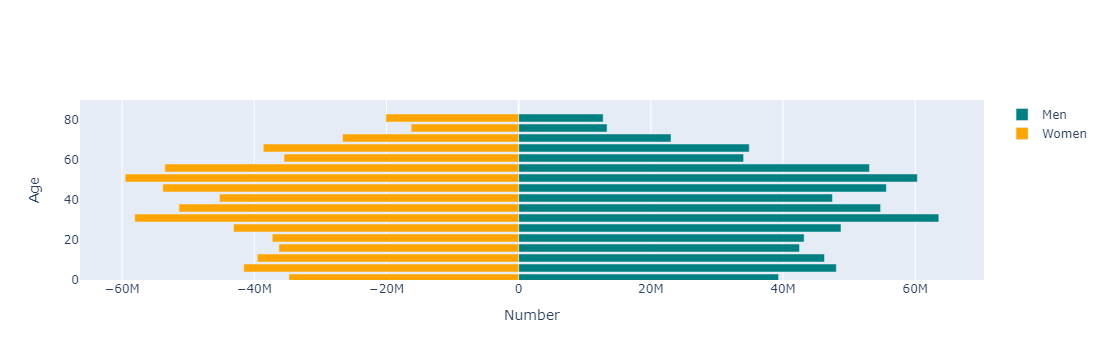

In [70]:
bins = [go.Bar(x = china.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -china.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

# India Population Pyramid

In [71]:
india = wbdata.get_dataframe(variables,country='IND')

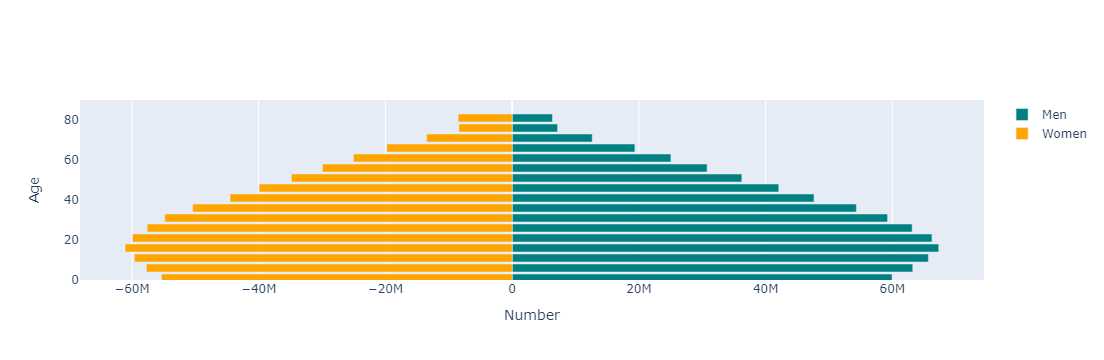

In [72]:
bins = [go.Bar(x = india.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -india.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

# Pakistan Population Pyramid

In [73]:
pakistan = wbdata.get_dataframe(variables,country='PAK')

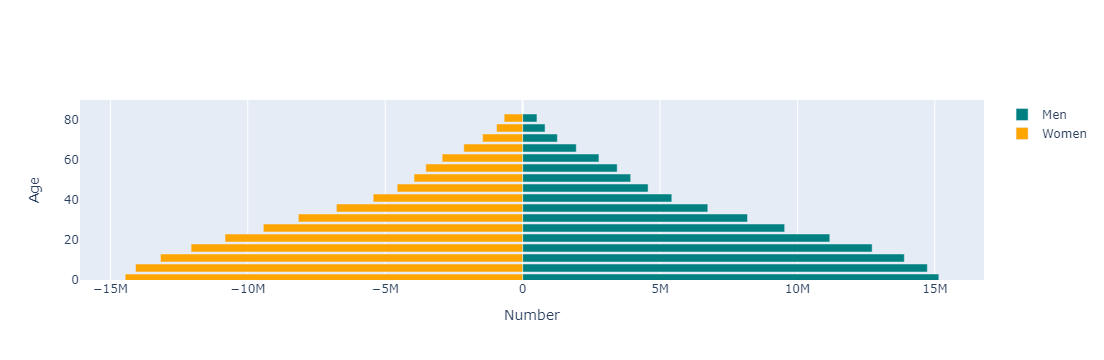

In [74]:
bins = [go.Bar(x = pakistan.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -pakistan.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

# Philippines Population Pyramid

In [75]:
philippines = wbdata.get_dataframe(variables,country='PHL')

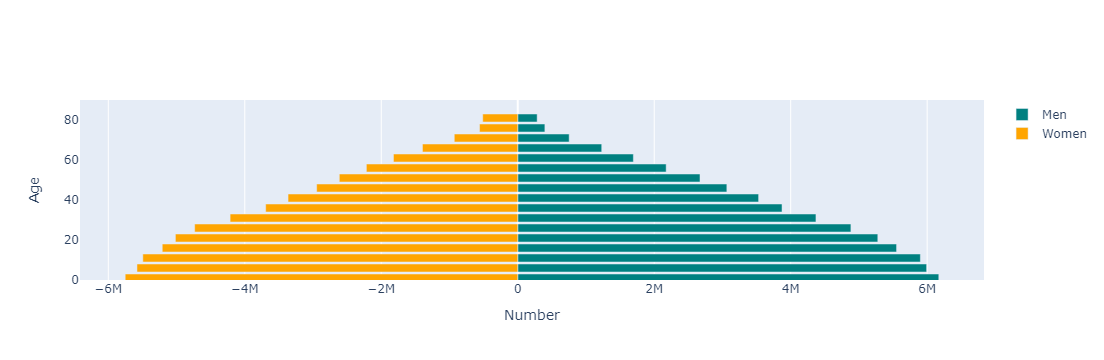

In [76]:
bins = [go.Bar(x = philippines.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -philippines.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

# Bangladesh  Population Pyramid

In [77]:
bangladesh = wbdata.get_dataframe(variables,country='BGD')

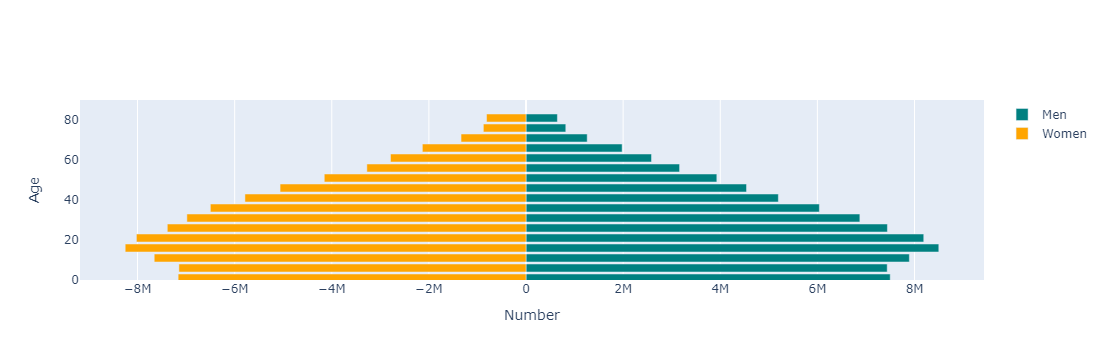

In [78]:
bins = [go.Bar(x = bangladesh.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='teal'),
               hoverinfo='skip'
               ),

        go.Bar(x = -bangladesh.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='orange'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))